In [2]:
#Sentiment Analysis on Titanic Movie Reviews
#Import the Algorithms and Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.stem import  WordNetLemmatizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB,ComplementNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [4]:
# Load the Train dataset
df=pd.read_csv("D:/DBA/project/Sentiment Analysis on movie_reviews/train.tsv", sep="\t")
pd.options.display.max_columns=50
df.head(10)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
#Count the number of values of each Sentiment
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [9]:
#Read the Phrases
df.Phrase[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [8]:
df.Phrase[1]


'A series of escapades demonstrating the adage that what is good for the goose'

In [54]:
df.Phrase[2]


'A series'

In [53]:
#Show the rows which has "Negative" Sentiment
df[df.Sentiment==0]

,PhraseId,SentenceId,Phrase,Sentiment
101,102,3,would have a hard time sitting through this one,0
103,104,3,have a hard time sitting through this one,0
157,158,5,Aggressive self-glorification and a manipulati...,0
159,160,5,self-glorification and a manipulative whitewash,0
201,202,7,Trouble Every Day is a plodding mess .,0
208,209,7,is a plodding mess,0
210,211,7,plodding mess,0
261,262,10,could hate it for the same reason,0
264,265,10,hate it,0
265,266,10,hate,0


In [12]:
#Show the rows which has "somewhat negative"  Sentiment
df[df.Sentiment==1]

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
33,34,1,"the gander , some of which occasionally amuses...",1
47,48,1,but none of which amounts to much of a story,1
49,50,1,none of which amounts to much of a story,1
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
94,95,3,", I suspect , would have a hard time sitting t...",1
100,101,3,would have a hard time sitting through this one .,1
105,106,3,a hard time sitting through this one,1
106,107,3,a hard time,1
107,108,3,hard time,1


In [13]:
#Show the rows which has "Neutral" Sentiment 
df[df.Sentiment==2]

,PhraseId,SentenceId,Phrase,Sentiment
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2
10,11,1,demonstrating the adage,2


In [14]:
#Show the rows which has "somewhat positive" Sentiment 
df[df.Sentiment==3]

,PhraseId,SentenceId,Phrase,Sentiment
21,22,1,good for the goose,3
22,23,1,good,3
46,47,1,amuses,3
64,65,2,"This quiet , introspective and entertaining in...",3
67,68,2,"quiet , introspective and entertaining",3
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
76,77,2,is worth seeking .,3
85,86,3,fans,3


In [16]:
#Show the rows which has "Positive" Sentiment 
df[df.Sentiment==4]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
66,67,2,"quiet , introspective and entertaining indepen...",4
74,75,2,entertaining,4
77,78,2,is worth seeking,4
117,118,4,A positively thrilling combination of ethnogra...,4
118,119,4,A positively thrilling combination of ethnogra...,4
123,124,4,thrilling,4
166,167,6,A comedy-drama of nearly epic proportions root...,4
172,173,6,nearly epic,4
176,177,6,rooted in a sincere performance by the title c...,4


In [17]:
#Null value checking
df.isnull().sum()


PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [18]:
# Text preprocessing (cleaning the reviews, tokenize and lemmatize the data)
def pre_process(text):
    text=text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    tokens=nltk.word_tokenize(text)  # tokenize
    wnl = WordNetLemmatizer()
    L=[wnl.lemmatize(w) for w in tokens]
    text=" ".join(L)
    return text


In [19]:
#Assign the dataset in input and output variable 
X = df['Phrase'].apply(pre_process)
y = df['Sentiment']


In [25]:
# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(109242,) (109242,)
(46818,) (46818,)


In [26]:
# Build the Model 
model1=make_pipeline(CountVectorizer(binary=True,stop_words="english"),BernoulliNB())
model2=make_pipeline(CountVectorizer(binary=False,stop_words="english"),MultinomialNB())
model3=make_pipeline(TfidfVectorizer(stop_words="english"),MultinomialNB())


In [27]:
# Fit the Model to the Train Dataset
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [28]:
# Predict y of Test Dataset
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_3 = model3.predict(X_test)


Text(0.5, 15.0, 'Predicted class')

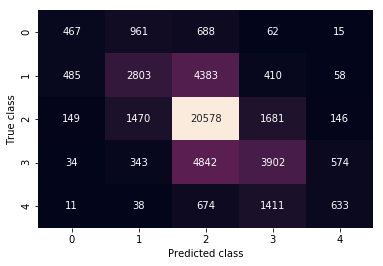

In [29]:
# Confusion matrix of y_test and Model1 prediction result
mat= confusion_matrix(y_test,y_pred_1)
sns.heatmap(mat,annot=True,cbar=False,fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')


Text(0.5, 15.0, 'Predicted class')

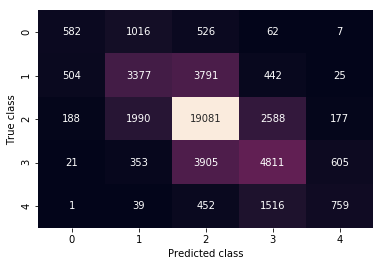

In [30]:
# Confusion matrix of y_test and Model2 prediction result
mat= confusion_matrix(y_test,y_pred_2)
sns.heatmap(mat,annot=True,cbar=False,fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')


Text(0.5, 15.0, 'Predicted class')

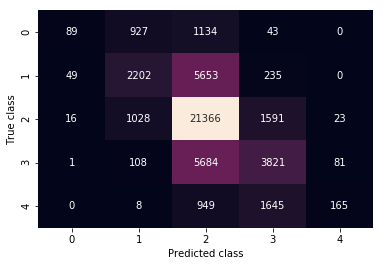

In [31]:
# Confusion matrix of y_test and Model3 prediction result
mat= confusion_matrix(y_test,y_pred_3)
sns.heatmap(mat,annot=True,cbar=False,fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')


In [37]:
# overall accuracy
print("Model1 Score: ", model1.score(X_test,y_test).round(3))
print("Model2 Score: ",model2.score(X_test,y_test).round(3))
print("Model3 Score: ",model3.score(X_test,y_test).round(3))


Model1 Score:  0.606
Model2 Score:  0.611
Model3 Score:  0.59


In [38]:
""" Train the second model on the entire training data set 
 and use this model to predict unknown test data"""
model4=make_pipeline(CountVectorizer(binary=False,stop_words="english"),MultinomialNB())
model4.fit(X,y)


Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [39]:
# load the test data
df1=pd.read_csv("D:/DBA/project/Sentiment Analysis on movie_reviews/test.tsv", sep="\t")
pd.options.display.max_columns=50
df1.head(10)


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


In [40]:
#Cleansing the test dataset
Xtest=df1.Phrase.apply(pre_process)


In [41]:
#Now make Prediction on Test dataset
predicted_sentiment=model4.predict(Xtest)
predicted_sentiment


array([3, 3, 2, ..., 1, 1, 1], dtype=int64)

In [46]:
#Now We create a DataFrame where we store the result as Sentiment analysis output
df2 = pd.DataFrame(predicted_sentiment,columns=['Predicted_Sentiment'])
df2.head(10)


,Predicted_Sentiment
0,3
1,3
2,2
3,3
4,3
5,3
6,3
7,3
8,3
9,2


In [47]:
#Take the "PhraseId" column from test dataset and put our prediction result according to it. 
final_result = df2.join(df1['PhraseId']).iloc[:,::-1]
final_result.head(10)


,PhraseId,Predicted_Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
5,156066,3
6,156067,3
7,156068,3
8,156069,3
9,156070,2


In [49]:
#Write the output to the csv file.
final_result.to_csv("D:/DBA/project/Sentiment Analysis on movie_reviews/final_submission.csv", index=False)
